In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
from ipywidgets import interact
from ipywidgets.widgets import Dropdown
import seaborn as sns
%matplotlib inline

In [2]:
online=pd.read_csv('online.csv')

In [3]:
marketing=pd.read_csv('Marketing_Spend.csv')
marketing.columns=['Date','Off','On']

In [41]:
online.tail(6)

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
54138,16682,20170101,GGOEGOFH020299,Galaxy Screen Cleaning Cloth,Office,31.0,1.99,954.95,57.75,6.5
54139,16682,20170101,GGOEGOXQ016399,Badge Holder,Office,31.0,1.99,954.95,57.75,6.5
54140,16682,20170101,GGOEYAAB031816,YouTube Men's Short Sleeve Hero Tee Black,Apparel,5.0,17.53,954.95,57.75,6.5
54141,16681,20170101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1.0,2.05,1.99,0.60,6.5
54142,16680,20170101,GGOENEBJ079499,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,Nest-USA,1.0,153.71,149.00,13.22,6.5
54143,16679,20170101,GGOENEBJ079499,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,Nest-USA,1.0,153.71,149.00,13.61,6.5


In [6]:
online.describe()

,Transaction ID,Date,Quantity,Avg. Price,Revenue,Tax,Delivery
count,54144.000000,5.414400e+04,54139.000000,54144.000000,54144.000000,54144.000000,54144.000000
mean,32337.041833,2.017068e+07,4.538429,51.483895,277.012997,14.731828,10.580648
std,8633.814868,3.328993e+02,20.031432,63.589249,902.588057,26.841324,19.690565
min,16679.000000,2.017010e+07,1.000000,0.390000,0.500000,0.000000,0.000000
25%,25332.000000,2.017041e+07,1.000000,5.590000,53.170000,0.000000,6.000000
50%,32548.000000,2.017071e+07,1.000000,16.990000,119.990000,6.810000,6.000000
75%,39008.250000,2.017093e+07,2.000000,100.910000,268.000000,17.840000,6.500000
max,48497.000000,2.017123e+07,900.000000,355.740000,23945.560000,754.140000,521.360000


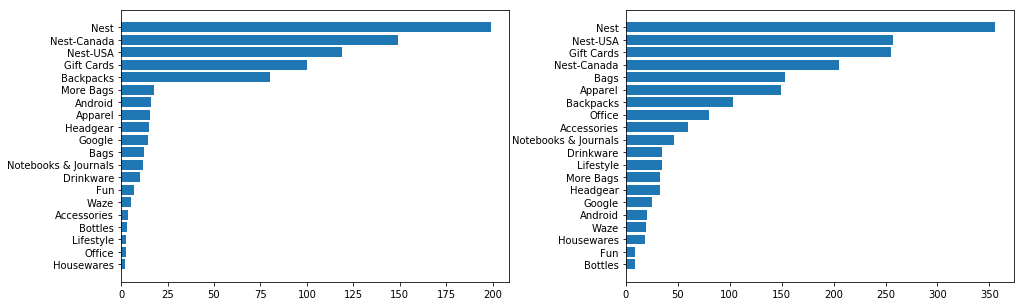

In [79]:
gb1=online.groupby('Product Category (Enhanced E-commerce)')['Avg. Price'].median().sort_values()
gb2=online.groupby('Product Category (Enhanced E-commerce)')['Avg. Price'].max().sort_values()


plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.barh(gb1.index,gb1.values)
#plt.yticks(gb1.index[])
#plt.ylim([0,1.1*np.max(gb1)])
plt.subplot(1,2,2)
plt.barh(gb2.index,gb2.values)
plt.subplots_adjust(wspace=.3)
#plt.yticks(rotation=30)
#plt.ylim([0,1.1*np.max(gb2)])

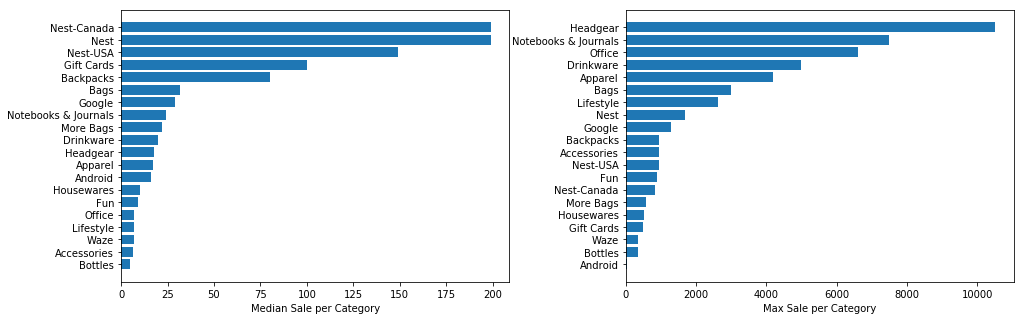

In [44]:
gb1=df.groupby('Product Category (Enhanced E-commerce)')['sale'].median().sort_values()
gb2=df.groupby('Product Category (Enhanced E-commerce)')['sale'].max().sort_values()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.barh(gb1.index,gb1.values)
plt.xlabel('Median Sale per Category')
#plt.yticks(gb1.index[])
#plt.ylim([0,1.1*np.max(gb1)])
plt.subplot(1,2,2)
plt.subplots_adjust(wspace=.3)
plt.barh(gb2.index,gb2.values)
plt.xlabel('Max Sale per Category')
_=plt.yticks(fontsize=10)
#plt.ylim([0,1.1*np.max(gb2)])

In [20]:
online.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54144 entries, 0 to 54143
Data columns (total 10 columns):
Transaction ID                            54144 non-null int64
Date                                      54144 non-null int64
Product SKU                               54144 non-null object
Product                                   54144 non-null object
Product Category (Enhanced E-commerce)    52928 non-null object
Quantity                                  54139 non-null float64
Avg. Price                                54144 non-null float64
Revenue                                   54144 non-null float64
Tax                                       54144 non-null float64
Delivery                                  54144 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 4.1+ MB


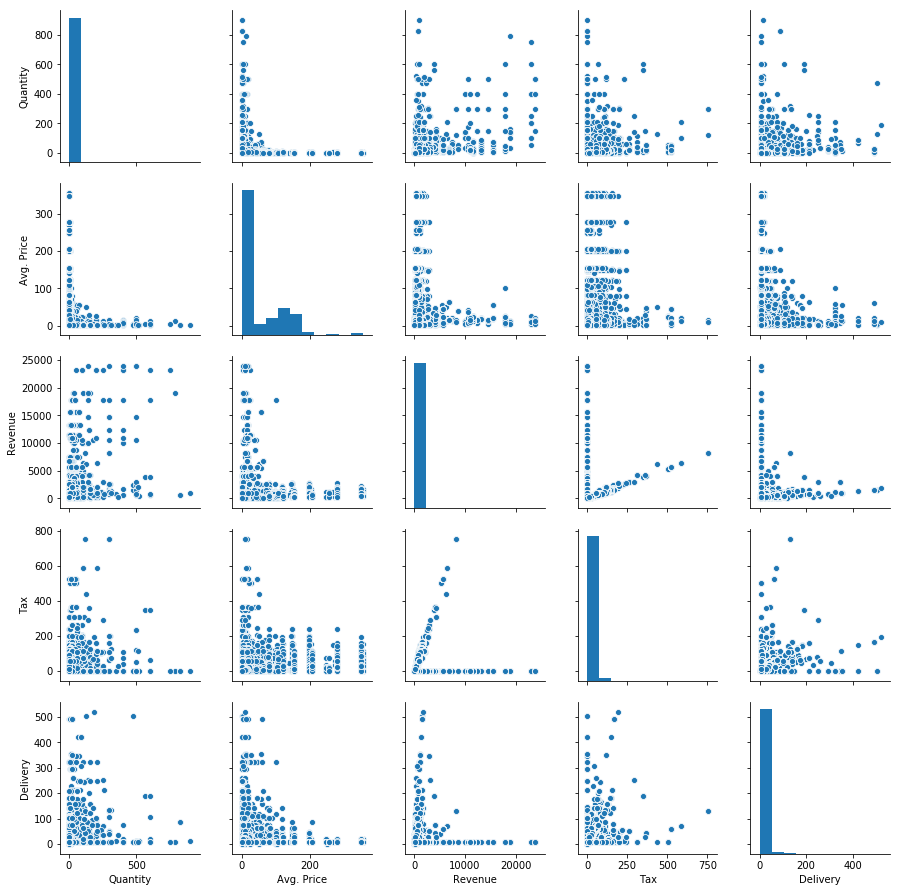

In [24]:
temp=online[['Quantity', 'Avg. Price',
       'Revenue', 'Tax', 'Delivery']].dropna()
sns.pairplot(temp)

In [22]:
online.columns

Index(['Transaction ID', 'Date', 'Product SKU', 'Product',
       'Product Category (Enhanced E-commerce)', 'Quantity', 'Avg. Price',
       'Revenue', 'Tax', 'Delivery'],
      dtype='object')

(array([5.1528e+04, 1.1720e+03, 1.4100e+02, 2.3000e+01, 2.7000e+01,
        0.0000e+00, 2.7000e+01, 3.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([  0.   ,  75.414, 150.828, 226.242, 301.656, 377.07 , 452.484,
        527.898, 603.312, 678.726, 754.14 ]),
 <a list of 10 Patch objects>)

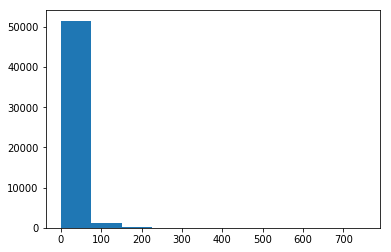

In [29]:
tax=df['Tax']
plt.hist(tax)

In [30]:
sum(tax>300)

60

In [35]:
taxfree=df[df['Tax']==0]
taxi=df[df['Tax']>0]

In [36]:
len(taxfree)

13728

In [37]:
len(taxi)

39196

In [38]:
taxi.describe()

,Transaction ID,Date,Quantity,Avg. Price,Revenue,Tax,Delivery
count,39196.000000,3.919600e+04,39196.000000,39196.000000,39196.000000,39196.000000,39196.000000
mean,32449.038601,2.017068e+07,3.922160,55.005733,226.542160,19.818401,10.066855
std,8707.146086,3.355633e+02,15.210946,65.120054,336.239339,29.213553,16.333478
min,16679.000000,2.017010e+07,1.000000,0.400000,0.500000,0.430000,0.000000
25%,25395.000000,2.017041e+07,1.000000,6.000000,55.990000,5.120000,6.000000
50%,32675.000000,2.017071e+07,1.000000,17.590000,125.100000,11.385000,6.000000
75%,39281.000000,2.017093e+07,2.000000,119.000000,268.000000,23.340000,6.500000
max,48497.000000,2.017123e+07,600.000000,355.740000,8248.800000,754.140000,521.360000


In [39]:
x=taxi['Revenue']
y=taxi['Tax']

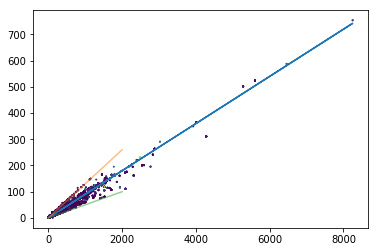

In [64]:
plt.scatter(x,y,1,alpha=1,c=taxi['Quantity'])
plt.plot(x,x*.09)
plt.plot(np.arange(2000),.13*np.arange(2000),alpha=.5)
plt.plot(np.arange(2000),.05*np.arange(2000),alpha=.5)

In [92]:
gbdf=df.groupby(['Product SKU','Product'])['Quantity'].count()

In [89]:
gp=gbdf.unstack()

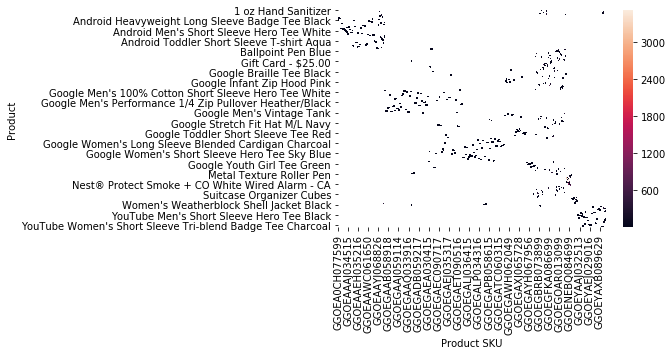

In [90]:
sns.heatmap(gp)

--------------------

#### DF

In [3]:
df=online.dropna()

In [8]:
df=online.copy()

In [4]:
df['DateTime']=df['Date'].apply(lambda x: datetime.strptime(str(x)[:4]+' '+str(x)[4:6]+' '+str(x)[6:8],'%Y %m %d'))

D:\WorkSpace\Ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
df['month']=df['DateTime'].apply(lambda x:x.month)
df['dow']=df['DateTime'].apply(lambda x:x.dayofweek)
df['day']=df['DateTime'].apply(lambda x:x.day)

D:\WorkSpace\Ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\WorkSpace\Ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\WorkSpace\Ana\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [6]:
df['sale']=df['Quantity']*df['Avg. Price']

D:\WorkSpace\Ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
from datetime import datetime

In [102]:
x='20071105'


datetime.datetime(2007, 11, 5, 0, 0)

In [14]:
df.head()

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,DateTime,month,dow,sale
0,48497,20171231,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99,2017-12-31,12,6,322.08
1,48496,20171231,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.0,80.52,395.00,33.14,6.50,2017-12-31,12,6,402.60
2,48495,20171231,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1.0,151.88,149.00,12.06,6.50,2017-12-31,12,6,151.88
3,48494,20171231,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1.0,48.92,47.99,3.82,6.50,2017-12-31,12,6,48.92
4,48493,20171231,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1.0,121.30,119.00,8.31,6.50,2017-12-31,12,6,121.30


In [15]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 54143
Data columns (total 15 columns):
Transaction ID                            52924 non-null int64
Date                                      52924 non-null int64
Product SKU                               52924 non-null object
Product                                   52924 non-null object
Product Category (Enhanced E-commerce)    52924 non-null object
Quantity                                  52924 non-null float64
Avg. Price                                52924 non-null float64
Revenue                                   52924 non-null float64
Tax                                       52924 non-null float64
Delivery                                  52924 non-null float64
DateTime                                  52924 non-null datetime64[ns]
month                                     52924 non-null int64
dow                                       52924 non-null int64
day                                       52924 no

In [108]:
len(set(df['Transaction ID']))

25061

In [115]:
gb.sort_values(ascending=False)[:5]

Transaction ID
32526    35
22958    30
40807    29
34094    28
38059    27
Name: Quantity, dtype: int64

In [117]:
A=np.zeros((2506,2506))

In [120]:
sum(gb>1)

10424

In [121]:
len(set(df['Product SKU']))

1145

In [122]:
len(set(df['Product']))

404

In [16]:
p2n={x:i for i,x in enumerate(set(df['Product']))}
n2p={i:x for i,x in enumerate(p2n)}

In [20]:
gb=df.groupby('Transaction ID')['Product']

In [17]:
n=len(p2n)
M=np.zeros((n,n))

In [18]:
len(p2n)

404

In [21]:
for v in tqdm(gb.groups.values()):
    temp=[]
    for i in v:
        temp.append(p2n[df.loc[i]['Product']])
    for i in temp:
        for j in temp:
            M[i][j]+=1

100%|██████████████████████████████████████████████████████████████████████████| 25061/25061 [00:24<00:00, 1024.70it/s]


In [22]:

for i in range(10):
    print(M[i][np.argsort(M[i])[::-1]][:4])
    print('-----')

[80. 20. 14. 13.]
-----
[129.  71.  58.  29.]
-----
[114.  17.  10.  10.]
-----
[14.  3.  3.  2.]
-----
[67. 30. 27. 24.]
-----
[59.  6.  5.  4.]
-----
[129.  50.  32.  25.]
-----
[41. 12. 11.  6.]
-----
[90. 15. 13.  8.]
-----
[131.  33.  20.  13.]
-----


In [23]:
@interact(a=Dropdown(
    options=p2n,
    description='Product:'))
def func(a):
    lst=np.argsort(M[a])[::-1][:4]
    total=M[a][lst[0]]
    print('Total   :  ',int(total),'\n' )
    for x in (lst[1:]):
        if (M[a][x]>0):
            print(np.round(M[a][x]*100/total,2),'%  :  ',n2p[x])

interactive(children=(Dropdown(description='Product:', options={'Red Spiral Google Notebook': 0, '1 oz Hand Sanitizer': 1, 'Google Youth Baseball Raglan Heather/Black': 2, "Google Men's Convertible Vest-Jacket Pewter": 3, 'Android Small Removable Sticker Sheet': 4, "Men's Softshell Jacket Black/Grey": 5, '22 oz YouTube Bottle Infuser': 6, 'Google Leather Journal-Brown': 7, "Android Men's  Zip Hoodie": 8, "Google Women's Vintage Hero Tee White": 9, 'Engraved Ceramic Google Mug': 10, 'Crunch Noise Dog Toy': 11, 'Waterproof Backpack': 12, 'Google Thermal Bottle Blue': 13, 'Google White Force 17 oz Bottle': 14, 'Red Shine 15 oz Mug': 15, "Google Women's Short Sleeve Badge Tee Grey": 16, 'Google Youth Girl Tee Green': 17, 'Google Baby Essentials Set': 18, "Google Men's Performance Polo Grey/Black": 19, 'Google Rucksack': 20, 'YouTube Hard Cover Journal': 21, 'Google Snapback Navy Cap': 22, 'YouTube Custom Decals': 23, 'Android Youth Short Sleeve T-shirt Aqua': 24, 'Nest® Cam Indoor Security Camera - USA': 25, 'Google Lunch Bag': 26, "Google Women's Performance Golf Polo Blue": 27, '20 oz Stainless Steel Insulated Tumbler': 28, "Google Men's Vintage Badge Tee White": 29, 'Google Collapsible Duffel Black': 30, 'Google Tee Blue': 31, "Android Women's Short Sleeve Tri-blend Badge Tee Light Blue": 32, "Google Women's Lightweight Microfleece Jacket": 33, "Android Men's Short Sleeve Hero Tee Heather": 34, 'Google Alpine Style Backpack': 35, 'Google 22 oz Water Bottle': 36, "Women's Weatherblock Shell Jacket Black": 37, '24 oz YouTube Sergeant Stripe Bottle': 38, 'Gel Roller Pen': 39, "Google Women's Yoga Pants": 40, 'Android Large Removable Sticker Sheet': 41, "YouTube Women's Short Sleeve Tri-blend Badge Tee Grey": 42, 'Android Luggage Tag': 43, "Google Women's Convertible Vest-Jacket Black": 44, 'Executive Twist Ballpoint Pen': 45, 'YouTube RFID Journal': 46, "Google Men's Airflow 1/4 Zip Pullover Black": 47, "Google Women's Quilted Insulated Vest Black": 48, 'Nest Detect - USA': 49, 'Google Snapback Hat Black': 50, 'Google Doodle Decal': 51, 'Large Zipper Top Tote Bag': 52, 'YouTube Trucker Hat': 53, "Google Men's Bike Short Sleeve Tee Charcoal": 54, "Google Women's 1/4 Zip Performance Pullover Black": 55, "Google Women's Short Sleeve Hero Tee Heather": 56, 'Google Toddler Short Sleeve T-shirt Royal Blue': 57, 'Google Canvas Tote Natural/Navy': 58, "Google Men's  Zip Hoodie": 59, 'Google Stretch Fit Hat S/M Navy': 60, 'Nest Tag - USA': 61, 'Google Youth Short Sleeve T-shirt Royal Blue': 62, 'Ballpoint Stylus Pen': 63, 'Insulated Bottle': 64, 'Android 24 oz Contigo Bottle': 65, "Google Women's Performance Hero Tee Gunmetal": 66, 'Google Vintage Henley Grey/Black': 67, 'Emoji Sticker Sheet': 68, 'Maze Pen': 69, 'Ballpoint Stick Pen 4 Pack': 70, "YouTube Men's Short Sleeve Hero Tee  White": 71, 'Android RFID Journal': 72, "Google Women's Tee Grey": 73, "Android Women's Racer Back Tank Black": 74, '26 oz Double Wall Insulated Bottle': 75, "Google Women's Scoop Neck Tee Green": 76, "Google Men's Bayside Graphic Tee": 77, 'Leather and Metal Ballpoint Pen': 78, 'Keyboard DOT Sticker': 79, "Google Men's Short Sleeve Hero Tee Light Blue": 80, "Google Women's Performance Polo Grey/Black": 81, 'YouTube Wool Heather Cap Heather/Black': 82, "Google Men's 100% Cotton Short Sleeve Hero Tee White": 83, 'Android Hard Cover Journal': 84, 'Google Infant Zip Hood Pink': 85, 'Android Matrix Tee White': 86, 'Google Hard Cover Journal': 87, 'Android Toddler Short Sleeve T-shirt Aqua': 88, '8 pc Android Sticker Sheet': 89, "Android Women's Fleece Hoodie": 90, "Google Men's Long Sleeve Raglan Ocean Blue": 91, 'Google Protector Tee Navy': 92, "Android Men's Long Sleeve Badge Crew Tee Heather": 93, 'Badge Holder': 94, "YouTube Women's Favorite Tee White": 95, "Google Men's Heavyweight Long Sleeve Hero Tee Navy": 96, 'You Tube Toddler Short Sleeve Tee Red': 97, 'Nest®  Thermostat E - CA': 98, "Google Women's Zip Hoodie Grey": 99, 'Galaxy Screen Cleaning Cloth': 1

In [227]:
DL=[]
PL=[]
TL=[]
for a in range(n):
    lst=np.argsort(M[a])[::-1][:4]
    total=M[a][lst[0]]
    x=lst[1]
    DL.append(np.round(M[a][x]*100/total,2))
    PL.append(n2p[x])
    TL.append(total)

In [245]:
threshold=100
srt=np.argsort(DL)[::-1]
for i in srt[:500]:
    if TL[i]>threshold:
        print(n2p[i],' \n',DL[i],'%  of  ',TL[i],'\n',PL[i])
        print('------------')

22 oz Android Bottle  
 70.5 %  of   139.0 
 Google 22 oz Water Bottle
------------
Google Kick Ball  
 55.87 %  of   281.0 
 Google Sunglasses
------------
1 oz Hand Sanitizer  
 55.04 %  of   129.0 
 Google Sunglasses
------------
Switch Tone Color Crayon Pen  
 52.29 %  of   153.0 
 Google Sunglasses
------------
Windup Android  
 49.87 %  of   381.0 
 Google Sunglasses
------------
SPF-15 Slim & Slender Lip Balm  
 48.36 %  of   122.0 
 Google Sunglasses
------------
Android Sticker Sheet Ultra Removable  
 47.09 %  of   206.0 
 Google Laptop and Cell Phone Stickers
------------
Galaxy Screen Cleaning Cloth  
 46.88 %  of   128.0 
 Google Sunglasses
------------
Foam Can and Bottle Cooler  
 45.21 %  of   292.0 
 Google Sunglasses
------------
Google Women's Short Sleeve Hero Tee Black  
 44.2 %  of   224.0 
 Google Men's 100% Cotton Short Sleeve Hero Tee Black
------------
Android Men's Short Sleeve Hero Tee Heather  
 44.08 %  of   211.0 
 Google Men's Vintage Badge Tee White
---

In [230]:
flag=TL>20

In [231]:
DLf=DL[flag]

array([268,  58,   0, 242, 190, 196, 265, 254,  47, 169,  53, 258,  69,
         9, 105, 220, 170, 160,  11, 255,  68, 307,  83, 251, 192,  66,
        91,  85, 289, 165, 308,  79,  18, 112, 293, 155, 214, 327, 175,
       310,  51, 110,  74, 157,  70, 213,  49,  56, 167, 313,  67,  90,
       259, 328, 291, 135,  95,  86, 198, 212, 230,  13,  37,  57, 127,
       294,  20, 130,  44,   7, 278,  81, 159, 320, 322, 147, 144, 236,
       174, 215, 178,  10, 275,  32, 290, 228,  28, 118, 191, 305,  16,
        14, 296, 261,  45, 166, 280, 107, 194, 171, 205, 270, 233,   8,
       179,  42, 183, 210, 125, 281, 104, 219, 279, 120, 187,  89, 184,
       149, 209, 240,  19, 237, 284, 140, 266, 273, 126, 277,  64, 197,
        41,  92,  54, 317, 134,  71, 150, 114, 248, 250,  22, 239, 115,
       146, 323,  84, 148,  23, 199, 111, 274, 153, 180, 304, 287, 216,
       185, 122, 257, 182,  87,  31, 119, 113, 207, 200, 235, 282, 181,
       286,  99, 303,  26, 152, 227, 245,   5,  80, 121, 260, 15

In [6]:
online.describe()

,Transaction ID,Date,Quantity,Avg. Price,Revenue,Tax,Delivery
count,54144.000000,5.414400e+04,54139.000000,54144.000000,54144.000000,54144.000000,54144.000000
mean,32337.041833,2.017068e+07,4.538429,51.483895,277.012997,14.731828,10.580648
std,8633.814868,3.328993e+02,20.031432,63.589249,902.588057,26.841324,19.690565
min,16679.000000,2.017010e+07,1.000000,0.390000,0.500000,0.000000,0.000000
25%,25332.000000,2.017041e+07,1.000000,5.590000,53.170000,0.000000,6.000000
50%,32548.000000,2.017071e+07,1.000000,16.990000,119.990000,6.810000,6.000000
75%,39008.250000,2.017093e+07,2.000000,100.910000,268.000000,17.840000,6.500000
max,48497.000000,2.017123e+07,900.000000,355.740000,23945.560000,754.140000,521.360000


In [7]:
online.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54144 entries, 0 to 54143
Data columns (total 10 columns):
Transaction ID                            54144 non-null int64
Date                                      54144 non-null int64
Product SKU                               54144 non-null object
Product                                   54144 non-null object
Product Category (Enhanced E-commerce)    52928 non-null object
Quantity                                  54139 non-null float64
Avg. Price                                54144 non-null float64
Revenue                                   54144 non-null float64
Tax                                       54144 non-null float64
Delivery                                  54144 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 4.1+ MB


In [10]:
online[online['Product Category (Enhanced E-commerce)'].isnull()]

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
300,48244,20171227,GGOEGAMC088199,Google Cappy Bib Blue,NaN,2.0,11.41,166.35,14.27,6.50
2384,46729,20171213,GGOEGCBC074299,Google Device Stand,NaN,4.0,5.09,339.61,0.00,6.00
2640,46559,20171212,GGOEGCBC074299,Google Device Stand,NaN,1.0,4.07,26.36,2.33,6.50
2978,46306,20171210,GGOEGCBC074299,Google Device Stand,NaN,3.0,5.09,118.57,10.27,6.00
2983,46305,20171210,GGOEGEHQ071199,"Google High Capacity 10,400mAh Charger",NaN,1.0,48.10,79.90,0.00,6.50
2997,46295,20171210,GGOEGCBC074299,Google Device Stand,NaN,1.0,5.09,29.48,0.00,6.00
4502,45276,20171201,GGOEGCBC074299,Google Device Stand,NaN,12.0,4.07,232.26,22.38,19.99
4572,45223,20171130,GGOEGCBC074299,Google Device Stand,NaN,4.0,4.99,85.43,8.47,6.00
4751,45109,20171129,GGOEGCBC074299,Google Device Stand,NaN,2.0,3.99,743.98,69.44,6.50
4760,45104,20171129,GGOEGCBC074299,Google Device Stand,NaN,1.0,4.99,11.47,1.23,6.00


(0, 973649.3359999735)

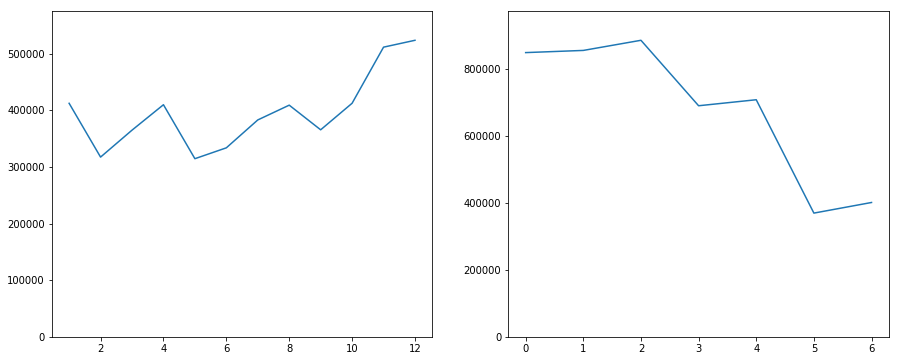

In [17]:
gb1=df.groupby('month')['sale'].sum()
gb2=df.groupby('dow')['sale'].sum()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(gb1)
plt.ylim([0,1.1*np.max(gb1)])
plt.subplot(1,2,2)
plt.plot(gb2)
plt.ylim([0,1.1*np.max(gb2)])

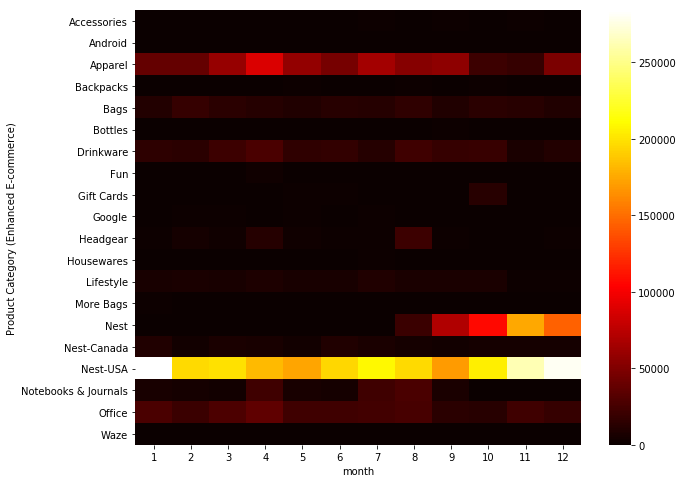

In [19]:
gbd=df.groupby(['Product Category (Enhanced E-commerce)','month'])['sale'].sum().unstack()
gbd.fillna(0,inplace=True)
plt.figure(figsize=(10,8))
sns.heatmap(gbd,cmap='hot')

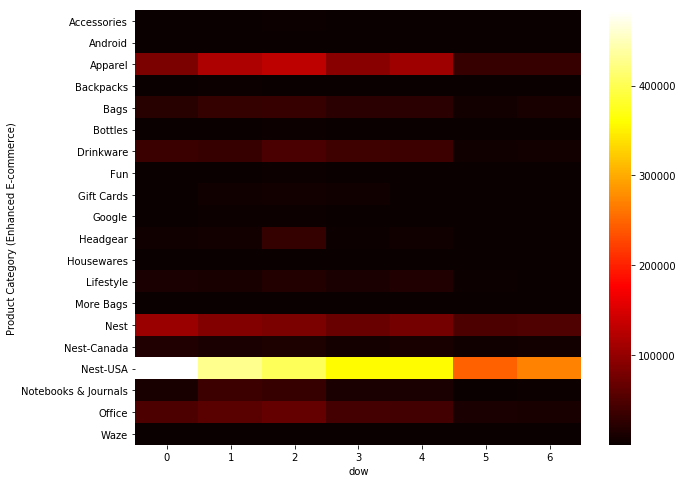

In [20]:
gbd=df.groupby(['Product Category (Enhanced E-commerce)','dow'])['sale'].sum().unstack()
gbd.fillna(0,inplace=True)
plt.figure(figsize=(10,8))
sns.heatmap(gbd,cmap='hot')

In [274]:
len(set(df['Product Category (Enhanced E-commerce)']))

20

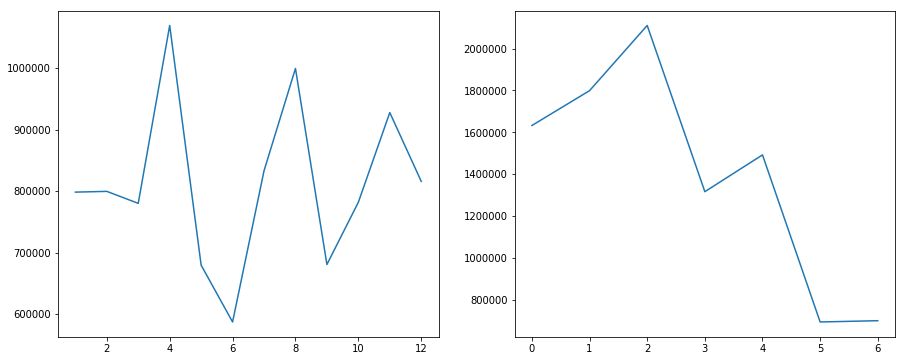

In [291]:
dfa=df[df['Product Category (Enhanced E-commerce)']!='Apparel']
gb1=dfa.groupby('month')['Revenue'].sum()
gb2=dfa.groupby('dow')['Revenue'].sum()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(gb1)
plt.subplot(1,2,2)
plt.plot(gb2)

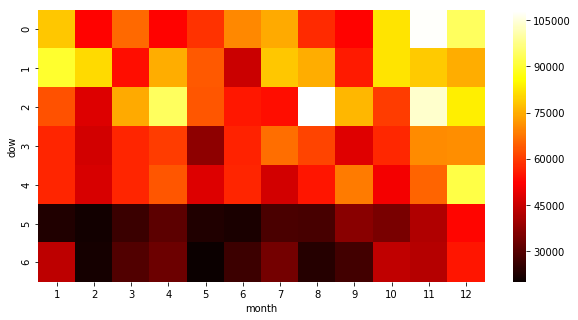

In [23]:
gbd=df.groupby(['dow','month'])['sale'].sum().unstack()
gbd.fillna(0,inplace=True)
plt.figure(figsize=(10,5))
sns.heatmap(gbd,cmap='hot')

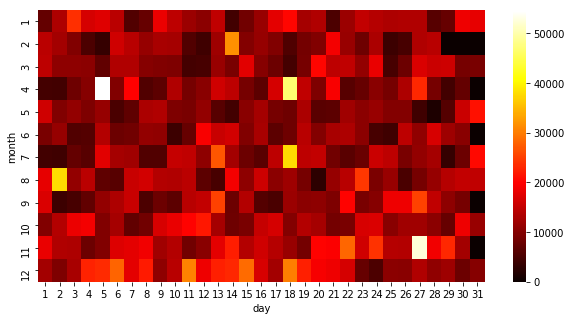

In [24]:
gbd=df.groupby(['month','day'])['sale'].sum().unstack()
gbd.fillna(0,inplace=True)
plt.figure(figsize=(10,5))
sns.heatmap(gbd,cmap='hot')

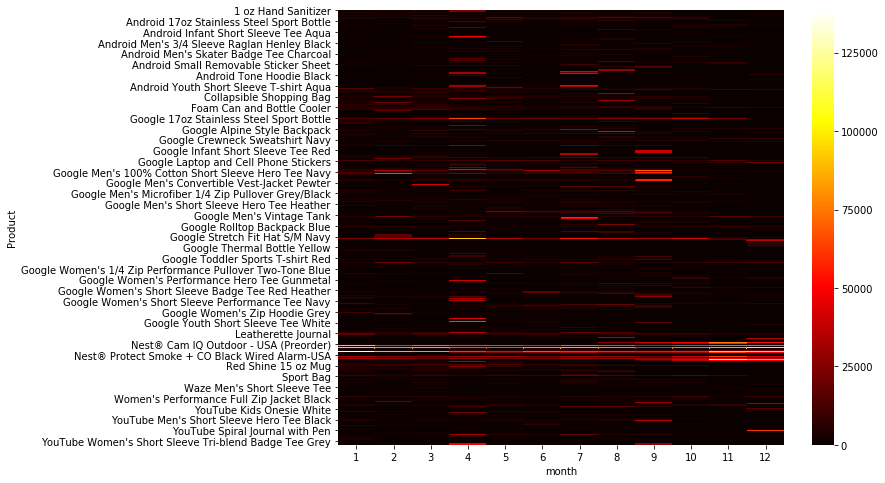

In [305]:
gbd=df.groupby(['Product','month'])['Revenue'].sum().unstack()
gbd.fillna(0,inplace=True)
plt.figure(figsize=(10,8))
sns.heatmap(gbd,cmap='hot')

In [87]:
marketing['DateTime']=marketing['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [88]:
marketing['Month']=marketing['DateTime'].apply(lambda x:x.month)
marketing['dow']=marketing['DateTime'].apply(lambda x:x.dayofweek)

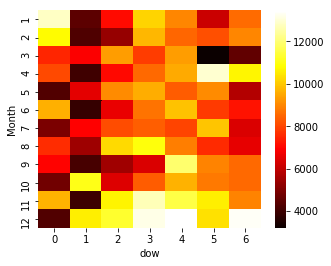

In [91]:
gbd=marketing.groupby(['Month','dow'])['On'].sum().unstack()
gbd.fillna(0,inplace=True)
plt.figure(figsize=(5,4))
sns.heatmap(gbd,cmap='hot')

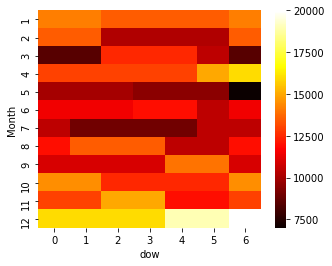

In [92]:
gbd=marketing.groupby(['Month','dow'])['Off'].sum().unstack()
gbd.fillna(0,inplace=True)
plt.figure(figsize=(5,4))
sns.heatmap(gbd,cmap='hot')

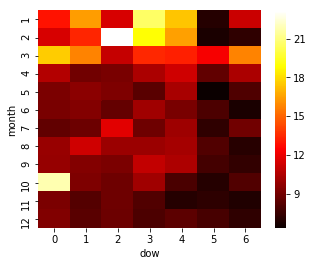

In [97]:
gbd=df.groupby(['month','dow'])['Delivery'].mean().unstack()
gbd.fillna(0,inplace=True)
plt.figure(figsize=(5,4))
sns.heatmap(gbd,cmap='hot')

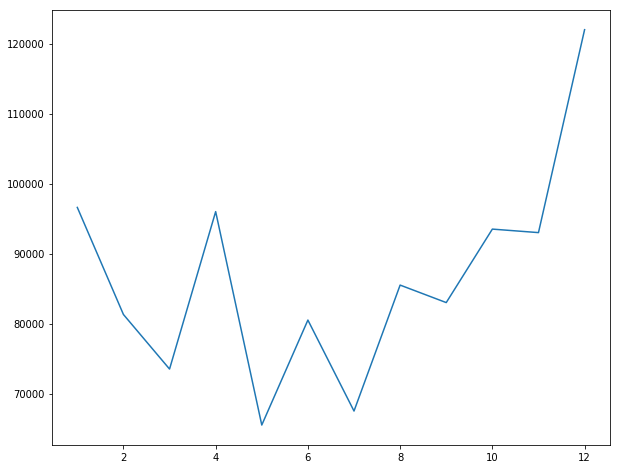

In [318]:
gbd=marketing.groupby(['Month'])['Off'].sum()
gbd.fillna(0,inplace=True)
plt.figure(figsize=(10,8))
plt.plot(gbd)

In [319]:
import nltk

In [321]:
import wordcloud

(-0.5, 799.5, 599.5, -0.5)

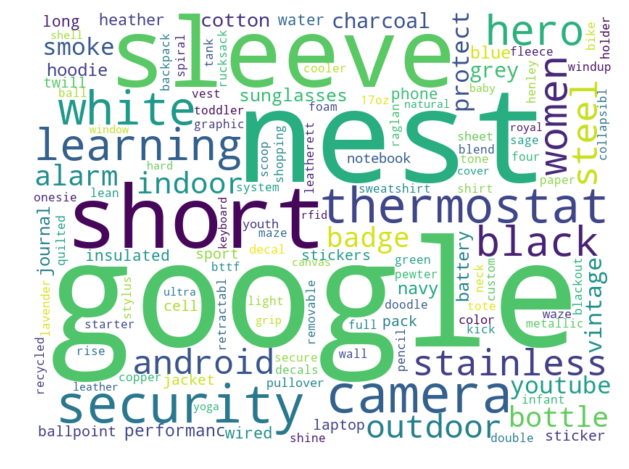

In [389]:
sw=['google','nest','usa']
image=wordcloud.WordCloud(width=800,height=600,background_color='white',max_words=130,stopwords=sw,repeat=False).generate_from_frequencies(frq)
plt.figure(figsize=(12,8))
plt.imshow(image,interpolation='bilinear')
plt.axis('off')

In [337]:
toktex=nltk.word_tokenize(text)

In [335]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\BD-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [386]:
frq=nltk.FreqDist(nltk.word_tokenize(tt))

In [381]:
frq.most_common(10)

[('google', 21790),
 ('nest®', 16433),
 ('-', 14289),
 ("'s", 13469),
 ('tee', 11533),
 ('men', 9080),
 ('usa', 8742),
 ('sleeve', 7964),
 ('cam', 7448),
 ('short', 7241)]

In [353]:
import re

In [384]:
text=' '.join(df['Product'])
tt=' '.join(re.findall('\w{4,10}',text.lower()))

In [385]:
tt[:100]

'nest protect smoke white battery alarm nest protect smoke white wired alarm nest learning thermostat'

-----------

In [81]:
flag=(df['month']==4)&(df['day']==18)
#df[flag].sort_values('sale
gb=df[flag].groupby('Transaction ID')['sale'].sum().sort_values()

In [82]:
gb[-4:]

Transaction ID
25858      774.00
25836     5614.44
25833    10904.77
25832    15631.61
Name: sale, dtype: float64

In [102]:
flag2=(df['Transaction ID']==24860)#&(df['day']==5)
df[flag2].groupby('Product Category (Enhanced E-commerce)')['sale'].sum().sort_values()

Product Category (Enhanced E-commerce)
Apparel                 1582.56
Office                  2393.00
Notebooks & Journals    7495.00
Headgear                9495.00
Name: sale, dtype: float64

In [101]:
flag2=(df['Transaction ID']==24863)#&(df['day']==5)
df[flag2].groupby('Product Category (Enhanced E-commerce)')['sale'].sum().sort_values()

Product Category (Enhanced E-commerce)
Fun           2247.5
Lifestyle     3500.0
Drinkware     6792.0
Office       10590.0
Name: sale, dtype: float64

In [100]:
flag2=(df['Transaction ID']==25833)#&(df['day']==5)
df[flag2].groupby('Product Category (Enhanced E-commerce)')['sale'].sum().sort_values()

Product Category (Enhanced E-commerce)
Apparel                 3910.77
Notebooks & Journals    6994.00
Name: sale, dtype: float64

In [99]:
flag2=(df['Transaction ID']==25832)#&(df['day']==5)
df[flag2].groupby('Product Category (Enhanced E-commerce)')['sale'].sum().sort_values()

Product Category (Enhanced E-commerce)
Apparel    15631.61
Name: sale, dtype: float64

In [107]:
flag2=(df['Transaction ID']==34429)#&(df['day']==5)
df[flag2].groupby('Product Category (Enhanced E-commerce)')['sale'].sum().sort_values()

Product Category (Enhanced E-commerce)
Drinkware        0.00
Lifestyle      641.58
Office        1934.85
Headgear     11216.39
Name: sale, dtype: float64

In [103]:
D=[5,18,18,2,27]
M=[4,4,7,8,11]

for i in range(len(D)):
    flag=(df['month']==M[i])&(df['day']==D[i])
    gb=df[flag].groupby('Transaction ID')['sale'].sum().sort_values()
    print(gb[-4:])
    print('--------')

Transaction ID
24880      617.09
24877      913.80
24860    20965.56
24863    23129.50
Name: sale, dtype: float64
--------
Transaction ID
25858      774.00
25836     5614.44
25833    10904.77
25832    15631.61
Name: sale, dtype: float64
--------
Transaction ID
33023      895.00
33013     2407.20
33038    10589.14
33036    14654.12
Name: sale, dtype: float64
--------
Transaction ID
34502      835.45
34458     2313.14
34439     8535.11
34429    14253.50
Name: sale, dtype: float64
--------
Transaction ID
44881    1175.0
44807    1361.0
44745    1412.0
44848    1684.2
Name: sale, dtype: float64
--------


In [105]:
len(df[flag].groupby('Transaction ID')['sale'].sum())

207

In [106]:
flag=(df['month']==11)&(df['day']==26)
gb=df[flag].groupby('Transaction ID')['sale'].sum().sort_values()
len(df[flag].groupby('Transaction ID')['sale'].sum())

66

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

In [111]:
serie=df['sale']

In [114]:
serie.index=df['DateTime']

In [119]:
fl=(serie.isnull())

In [120]:
serie[fl]=0

D:\WorkSpace\Ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
res=sd(serdf.groupby('DateTime').sum())

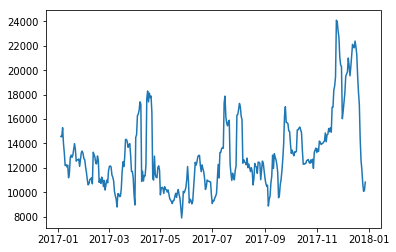

In [136]:
plt.plot(res.trend)

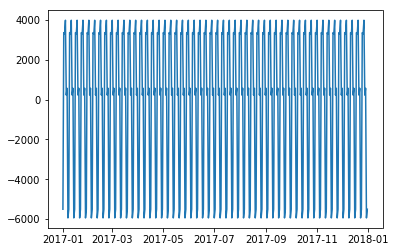

In [137]:
plt.plot(res.seasonal)

In [129]:
serdf.head()

,sale
DateTime,
2017-12-31,322.08
2017-12-31,402.60
2017-12-31,151.88
2017-12-31,48.92
2017-12-31,121.30


Text(0,0.5,'Tax')

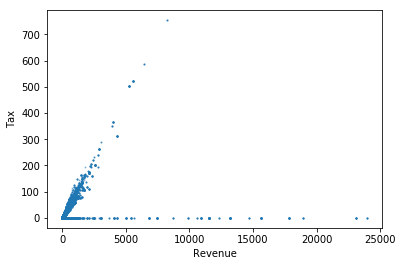

In [45]:
plt.scatter(df['Revenue'],df['Tax'],s=1,alpha=.4)
plt.xlabel('Revenue')
plt.ylabel('Tax')

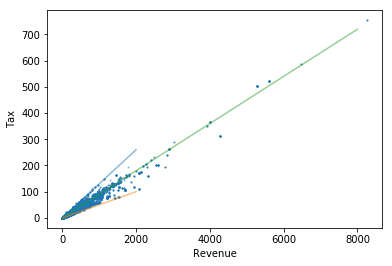

In [46]:
flag=df['Tax']>0
plt.scatter(df[flag]['Revenue'],df[flag]['Tax'],s=1,alpha=.4)
plt.xlabel('Revenue')
plt.ylabel('Tax')
plt.plot(np.arange(2000),.13*np.arange(2000),alpha=.5)
plt.plot(np.arange(2000),.05*np.arange(2000),alpha=.5)
plt.plot(np.arange(8000),.09*np.arange(8000),alpha=.5)

In [36]:
df[df['Tax']>200]

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,DateTime,month,dow,day,sale
2009,46976,20171215,GGOEGDHC087099,Google Thermal Bottle Blue,Drinkware,102.0,19.18,6459.95,587.58,68.82,2017-12-15,12,4,15,1956.36
2010,46976,20171215,GGOEGDHR086999,Google Thermal Bottle Red,Drinkware,102.0,19.18,6459.95,587.58,68.82,2017-12-15,12,4,15,1956.36
2011,46976,20171215,GGOEGOCL087799,Google Large Standard Journal Navy,Office,209.0,12.79,6459.95,587.58,68.82,2017-12-15,12,4,15,2673.11
3611,45888,20171206,GGOEYAEB091812,YouTube Tee Black,Apparel,41.0,21.87,5279.63,502.18,6.00,2017-12-06,12,2,6,896.67
3612,45888,20171206,GGOEYAEB091813,YouTube Tee Black,Apparel,41.0,21.87,5279.63,502.18,6.00,2017-12-06,12,2,6,896.67
3613,45888,20171206,GGOEYAEB091814,YouTube Tee Black,Apparel,41.0,21.87,5279.63,502.18,6.00,2017-12-06,12,2,6,896.67
3614,45888,20171206,GGOEYAEB091815,YouTube Tee Black,Apparel,41.0,21.87,5279.63,502.18,6.00,2017-12-06,12,2,6,896.67
3615,45888,20171206,GGOEYAEB091816,YouTube Tee Black,Apparel,41.0,21.87,5279.63,502.18,6.00,2017-12-06,12,2,6,896.67
3616,45888,20171206,GGOEYAEB091817,YouTube Tee Black,Apparel,20.0,22.41,5279.63,502.18,6.00,2017-12-06,12,2,6,448.20
3617,45888,20171206,GGOEYAWQ089748,YouTube Kids Onesie White,Apparel,5.0,26.49,5279.63,502.18,6.00,2017-12-06,12,2,6,132.45


In [22]:
once=(df[df['sale']>df['Revenue']])
once_full=once.copy()
once=once[once['Revenue']>10]

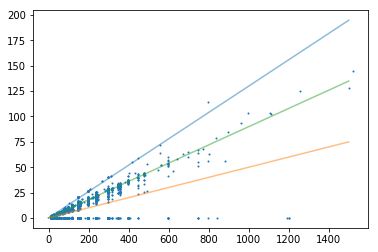

In [23]:
plt.scatter(once['Revenue'],once['Tax'],s=1)
xl=1500
plt.plot(np.arange(xl),.13*np.arange(xl),alpha=.5)
plt.plot(np.arange(xl),.05*np.arange(xl),alpha=.5)
plt.plot(np.arange(xl),.09*np.arange(xl),alpha=.5)

In [24]:
once['Tax_Per']=once['Tax']/once['Revenue']

In [559]:
order=once.groupby('Product Category (Enhanced E-commerce)')['Tax_Per'].median().sort_values()
order

Product Category (Enhanced E-commerce)
Gift Cards              0.000000
Lifestyle               0.034586
Fun                     0.047831
Headgear                0.084542
Nest-USA                0.088725
Nest                    0.090707
Waze                    0.091769
Bags                    0.092273
Office                  0.093489
Apparel                 0.093910
Drinkware               0.093940
Backpacks               0.097866
Android                 0.103745
Bottles                 0.106843
Notebooks & Journals    0.110836
Google                  0.129378
Nest-Canada             0.135678
Name: Tax_Per, dtype: float64

-----------------
### Clustering

In [92]:
gb=df.groupby(['Transaction ID','Product Category (Enhanced E-commerce)'])['sale'].sum()

In [93]:
TranPro=gb.unstack().fillna(0)

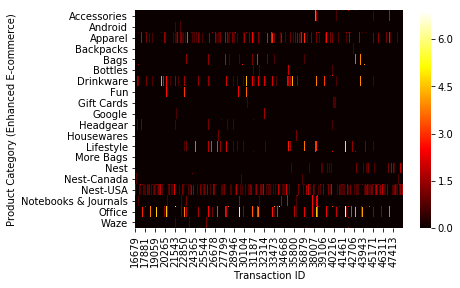

In [40]:
kmdata=np.log1p(np.transpose(TranPro))
sns.heatmap(kmdata,cmap='hot')

In [38]:
from sklearn.cluster import KMeans

In [61]:
means=20
km=KMeans(means,verbose=0)

In [62]:
res=km.fit(np.transpose(kmdata))

In [43]:
res=km.transform(kmdata)

In [46]:
len(res)

25061

In [64]:
means=20

In [63]:
l=km.labels_

(array([4582., 6127.,  234.,  132.,  569.,  479., 1945.,  469.,  345.,
         154.,   77., 4924., 1739., 1558.,  995.,  127.,   85.,  147.,
         373.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

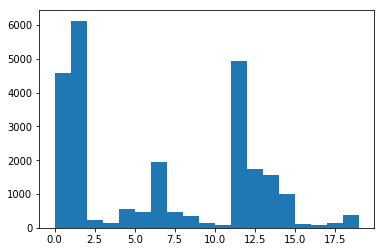

In [65]:
_=plt.hist(l,bins=range(means))

In [114]:
n=len(small_data)

In [115]:
MM=np.zeros((n,n))

In [143]:
for i in tqdm(range(n)):
    for j in range(i+1,n):
        MM[i][j]=np.linalg.norm(small_data[i]-small_data[j])
        MM[j][i]=MM[i][j]


100%|████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 2572.84it/s]

In [86]:
len(kmd)

25061

In [94]:
kmdata=np.log1p(TranPro)

In [95]:
kmdata.head()

Product Category (Enhanced E-commerce),Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Transaction ID,,,,,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.041552,0.0,0.000000,0.0
16680,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.041552,0.0,0.000000,0.0
16681,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.115142,0.0
16682,0.0,0.0,5.172187,0.0,4.551242,0.0,5.514235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.166727,0.0
16684,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.793136,0.0,0.000000,0.0


In [112]:
flag=np.sum(kmdata,axis=1)>30

In [113]:
small_data=kmdata[flag].values
S=(np.sum(kmdata,axis=1)[flag]).values

In [156]:
fl=flag[flag].index
n2f={i:x for i,x in enumerate(fl)}

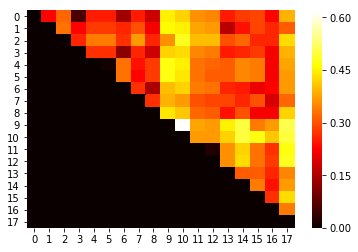

In [142]:
sns.heatmap(np.round(MMM,2),cmap='hot')

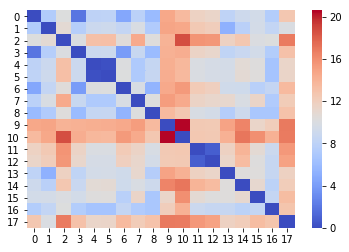

In [228]:
sns.heatmap(np.round(MM,2),cmap='coolwarm')

In [179]:
@interact(a=Dropdown(
    options=n2f,
    description='Product:'))
def heat(a):
    temp=df[df['Transaction ID']==a]
    print('On :  ',temp['Date'].values[0],'   |   Total :  ',np.round(sum(temp['sale'])))
    print('--------------')
    print(temp.groupby('Product Category (Enhanced E-commerce)')['sale'].sum().sort_values())

interactive(children=(Dropdown(description='Product:', options={0: 16992, 1: 20292, 2: 20374, 3: 20874, 4: 20988, 5: 21060, 6: 23520, 7: 24281, 8: 24674, 9: 24860, 10: 24863, 11: 26098, 12: 26099, 13: 26478, 14: 34769, 15: 34865, 16: 34872, 17: 37185}, value=16992), Output()), _dom_classes=('widget-interact',))

In [124]:
df[df['Transaction ID']==16992].groupby('Product Category (Enhanced E-commerce)')['sale'].sum().sort_values()

Product Category (Enhanced E-commerce)
Headgear      19.59
More Bags     68.07
Bags          72.15
Office       126.12
Lifestyle    139.14
Drinkware    160.66
Apparel      381.63
Name: sale, dtype: float64

In [125]:
df[df['Transaction ID']==20874].groupby('Product Category (Enhanced E-commerce)')['sale'].sum().sort_values()

Product Category (Enhanced E-commerce)
Bags          69.95
Lifestyle     70.00
Office        75.00
More Bags     87.96
Headgear     114.95
Drinkware    209.85
Apparel      346.88
Name: sale, dtype: float64

In [130]:
len(MM)

18

In [141]:
MMM=MM.copy()
for i,m in enumerate(MMM):
    m/=S[i]

In [149]:
df[df['Transaction ID']==fl[4]].groupby('Product Category (Enhanced E-commerce)')['sale'].sum().sort_values()

Product Category (Enhanced E-commerce)
Apparel                  59.99
Lifestyle                61.60
Office                   96.80
Notebooks & Journals    263.78
Bags                    351.78
Drinkware               439.78
Name: sale, dtype: float64

In [150]:
df[df['Transaction ID']==fl[5]].groupby('Product Category (Enhanced E-commerce)')['sale'].sum().sort_values()

Product Category (Enhanced E-commerce)
Apparel                  59.99
Lifestyle                67.20
Office                  105.60
Notebooks & Journals    287.76
Bags                    358.16
Drinkware               479.76
Name: sale, dtype: float64

In [151]:
df[df['Transaction ID']==fl[4]]

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,DateTime,month,dow,day,sale
47467,20988,20170221,GGOEGADB059615,Google Men's Quilted Insulated Vest Black,Apparel,1.0,59.99,1361.51,129.28,158.74,2017-02-21,2,1,21,59.99
47468,20988,20170221,GGOEGBMB073799,Google Zipper-front Sports Bag,Bags,22.0,15.99,1361.51,129.28,158.74,2017-02-21,2,1,21,351.78
47470,20988,20170221,GGOEGDHQ015399,26 oz Double Wall Insulated Bottle,Drinkware,22.0,19.99,1361.51,129.28,158.74,2017-02-21,2,1,21,439.78
47471,20988,20170221,GGOEGHGC019799,Google Sunglasses,Lifestyle,6.0,2.80,1361.51,129.28,158.74,2017-02-21,2,1,21,16.80
47472,20988,20170221,GGOEGHGH019699,Google Sunglasses,Lifestyle,5.0,2.80,1361.51,129.28,158.74,2017-02-21,2,1,21,14.00
47473,20988,20170221,GGOEGHGR019499,Google Sunglasses,Lifestyle,6.0,2.80,1361.51,129.28,158.74,2017-02-21,2,1,21,16.80
47474,20988,20170221,GGOEGHGT019599,Google Sunglasses,Lifestyle,5.0,2.80,1361.51,129.28,158.74,2017-02-21,2,1,21,14.00
47475,20988,20170221,GGOEGOAR013099,Google Stylus Pen w/ LED Light,Office,22.0,4.40,1361.51,129.28,158.74,2017-02-21,2,1,21,96.80
47476,20988,20170221,GGOEGOCL077699,Google Hard Cover Journal,Notebooks & Journals,22.0,11.99,1361.51,129.28,158.74,2017-02-21,2,1,21,263.78


In [152]:
df[df['Transaction ID']==fl[5]]

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,DateTime,month,dow,day,sale
47370,21060,20170222,GGOEGADB059615,Google Men's Quilted Insulated Vest Black,Apparel,1.0,59.99,1454.23,165.59,492.84,2017-02-22,2,2,22,59.99
47371,21060,20170222,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,8.0,12.79,1454.23,165.59,492.84,2017-02-22,2,2,22,102.32
47372,21060,20170222,GGOEGBMB073799,Google Zipper-front Sports Bag,Bags,16.0,15.99,1454.23,165.59,492.84,2017-02-22,2,2,22,255.84
47374,21060,20170222,GGOEGDHQ015399,26 oz Double Wall Insulated Bottle,Drinkware,24.0,19.99,1454.23,165.59,492.84,2017-02-22,2,2,22,479.76
47375,21060,20170222,GGOEGHGC019799,Google Sunglasses,Lifestyle,7.0,2.80,1454.23,165.59,492.84,2017-02-22,2,2,22,19.60
47376,21060,20170222,GGOEGHGH019699,Google Sunglasses,Lifestyle,5.0,2.80,1454.23,165.59,492.84,2017-02-22,2,2,22,14.00
47377,21060,20170222,GGOEGHGR019499,Google Sunglasses,Lifestyle,7.0,2.80,1454.23,165.59,492.84,2017-02-22,2,2,22,19.60
47378,21060,20170222,GGOEGHGT019599,Google Sunglasses,Lifestyle,5.0,2.80,1454.23,165.59,492.84,2017-02-22,2,2,22,14.00
47379,21060,20170222,GGOEGOAR013099,Google Stylus Pen w/ LED Light,Office,24.0,4.40,1454.23,165.59,492.84,2017-02-22,2,2,22,105.60
47380,21060,20170222,GGOEGOCL077699,Google Hard Cover Journal,Notebooks & Journals,24.0,11.99,1454.23,165.59,492.84,2017-02-22,2,2,22,287.76


In [153]:
df[df['Transaction ID']==fl[9]].groupby('Product Category (Enhanced E-commerce)')['sale'].sum().sort_values()

Product Category (Enhanced E-commerce)
Apparel                 1582.56
Office                  2393.00
Notebooks & Journals    7495.00
Headgear                9495.00
Name: sale, dtype: float64

(array([5486., 5464., 4893., 4572., 4193., 5251., 6150., 4908., 5628.,
        6379.]),
 array([20170101., 20170214., 20170327., 20170440., 20170553., 20170666.,
        20170779., 20170892., 20171005., 20171118., 20171231.]),
 <a list of 10 Patch objects>)

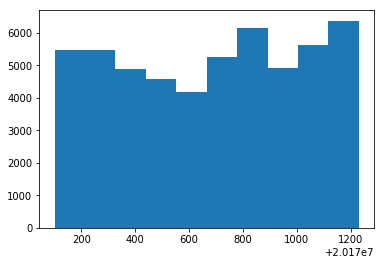

In [181]:
plt.hist(df['Date'],)

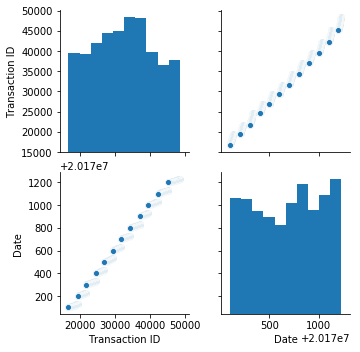

In [184]:
sns.pairplot(df[['Transaction ID','Date']])

In [183]:
df.columns

Index(['Transaction ID', 'Date', 'Product SKU', 'Product',
       'Product Category (Enhanced E-commerce)', 'Quantity', 'Avg. Price',
       'Revenue', 'Tax', 'Delivery', 'DateTime', 'month', 'dow', 'day',
       'sale'],
      dtype='object')

In [194]:
once.columns

Index(['Transaction ID', 'Date', 'Product SKU', 'Product',
       'Product Category (Enhanced E-commerce)', 'Quantity', 'Avg. Price',
       'Revenue', 'Tax', 'Delivery', 'DateTime', 'month', 'dow', 'day', 'sale',
       'Tax_Per'],
      dtype='object')

In [186]:
len(once_full)

3244

In [191]:
(once_full.head(3))

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,DateTime,month,dow,day,sale
0,48497,20171231,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.0,34.44,19.99,2017-12-31,12,6,31,322.08
1,48496,20171231,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.0,80.52,395.0,33.14,6.50,2017-12-31,12,6,31,402.60
2,48495,20171231,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1.0,151.88,149.0,12.06,6.50,2017-12-31,12,6,31,151.88


In [192]:
from sklearn.linear_model import LinearRegression

In [193]:
lr=LinearRegression()

In [222]:
X=once_full[['Avg. Price', 'Tax', 'Delivery','sale','QT','QD']]
y=once_full['Revenue']

In [223]:
res=lr.fit(X,y)

In [224]:
res.score(X,y)

0.9997918842596893

In [217]:
X.loc[0]

Quantity        4.00
Avg. Price     80.52
Tax            34.44
Delivery       19.99
sale          322.08
QT            137.76
QD             79.96
Name: 0, dtype: float64

In [225]:
res.predict(np.array([80.52,34.44,19.99,322.08,137.76,79.96]).reshape(1,-1))

array([315.03600286])

In [226]:
np.round(res.coef_,2)

array([-0.  , -0.03,  0.02,  0.98,  0.  , -0.  ])

In [213]:
once_full['QT']=once_full['Quantity']*once_full['Tax']
once_full['QD']=once_full['Quantity']*once_full['Delivery']

In [233]:
havenull=online[online.isnull().any(axis=1)]

In [237]:
(havenull)['sale']=havenull['Quantity']*havenull['Avg. Price']

D:\WorkSpace\Ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [239]:
havenull[(havenull['sale'].isnull())]

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,sale
23026,34439,20170802,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,NaN,1.39,9925.11,0.0,6.0,NaN
23060,34429,20170802,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,NaN,1.39,18976.72,0.0,6.0,NaN
41574,24860,20170405,GGOEGGOA017399,Maze Pen,Office,NaN,0.99,23945.56,0.0,6.5,NaN
41579,24860,20170405,GGOEYFKQ020699,YouTube Custom Decals,Office,NaN,1.99,23945.56,0.0,6.5,NaN
48422,20374,20170214,GGOEGODR017799,Recycled Mouse Pad,NaN,NaN,1.50,17855.50,0.0,6.5,NaN


In [242]:
t=online[online['Transaction ID']==24860]
t

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
41574,24860,20170405,GGOEGGOA017399,Maze Pen,Office,NaN,0.99,23945.56,0.0,6.5
41575,24860,20170405,GGOEGHPJ080110,Google 5-Panel Cap,Headgear,500.0,18.99,23945.56,0.0,6.5
41576,24860,20170405,GGOEGOAQ018099,Pen Pencil & Highlighter Set,Office,300.0,3.99,23945.56,0.0,6.5
41577,24860,20170405,GGOEGOBG023599,Colored Pencil Set,Office,400.0,2.99,23945.56,0.0,6.5
41578,24860,20170405,GGOEGOCL077699,Google Hard Cover Journal,Notebooks & Journals,500.0,14.99,23945.56,0.0,6.5
41579,24860,20170405,GGOEYFKQ020699,YouTube Custom Decals,Office,NaN,1.99,23945.56,0.0,6.5
41580,24860,20170405,GGOEYHPB072210,YouTube Twill Cap,Apparel,144.0,10.99,23945.56,0.0,6.5


In [248]:
df.head()

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,DateTime,month,dow,day,sale
0,48497,20171231,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99,2017-12-31,12,6,31,322.08
1,48496,20171231,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.0,80.52,395.00,33.14,6.50,2017-12-31,12,6,31,402.60
2,48495,20171231,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1.0,151.88,149.00,12.06,6.50,2017-12-31,12,6,31,151.88
3,48494,20171231,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1.0,48.92,47.99,3.82,6.50,2017-12-31,12,6,31,48.92
4,48493,20171231,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1.0,121.30,119.00,8.31,6.50,2017-12-31,12,6,31,121.30


In [246]:
from sklearn.ensemble import RandomForestRegressor

In [256]:
RFR=RandomForestRegressor(n_estimators=100)

In [249]:
gb=df.groupby('DateTime')['sale'].sum()

In [259]:
RFR.fit(X,y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


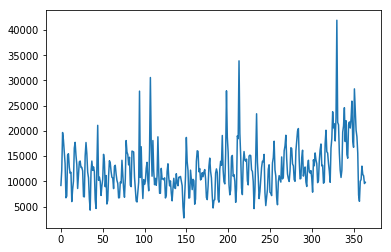

In [261]:
plt.plot(RFR.predict(np.arange(365).reshape(-1,1)))

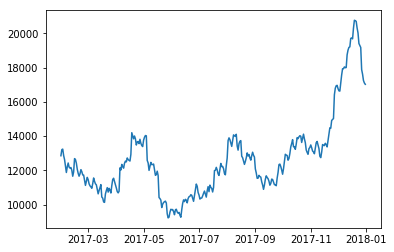

In [283]:
rolled=gb.rolling(30).mean()
plt.plot(rolled)

In [380]:
NU=(df[df['Product Category (Enhanced E-commerce)']=='Nest-USA']).groupby('DateTime')['sale'].sum()
NU2=(df).groupby('DateTime')['sale'].sum()
NU3=(df[df['Product Category (Enhanced E-commerce)']=='Nest-USA']).groupby('month')['sale'].sum()

In [391]:
datetime.month

<attribute 'month' of 'datetime.date' objects>

In [286]:
import statsmodels.api as st

In [528]:
dec=st.tsa.seasonal_decompose(NU.rolling(10).mean().dropna())
#dec=st.tsa.seasonal_decompose(NU3,freq=1)

Text(0.5,0,'Residual')

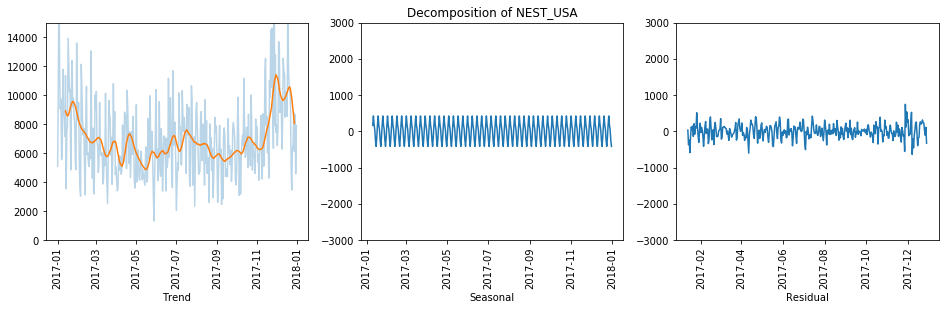

In [541]:
plt.figure(figsize=(16,4))
ax1=plt.subplot(1,3,1)
plt.plot(NU,alpha=0.3)
ax1.set_ylim([0,15000])
plt.plot(dec.trend)
plt.xticks(rotation=90)
ax2=plt.subplot(1,3,2)#,sharey=ax1)
ax2.set_ylim([-3000,3000])
plt.xticks(rotation=90)
plt.plot(dec.seasonal)
plt.title('Decomposition of NEST_USA')
ax3=plt.subplot(1,3,3)#,sharey=ax1)
ax3.set_ylim([-3000,3000])
plt.plot(dec.resid)
plt.xticks(rotation=90)
ax1.set_xlabel('Trend')
ax2.set_xlabel('Seasonal')
ax3.set_xlabel('Residual')

In [365]:
dec2=st.tsa.seasonal_decompose(dec.resid.dropna())

(array([736330., 736389., 736450., 736511., 736573., 736634., 736695.]),
 <a list of 7 Text xticklabel objects>)

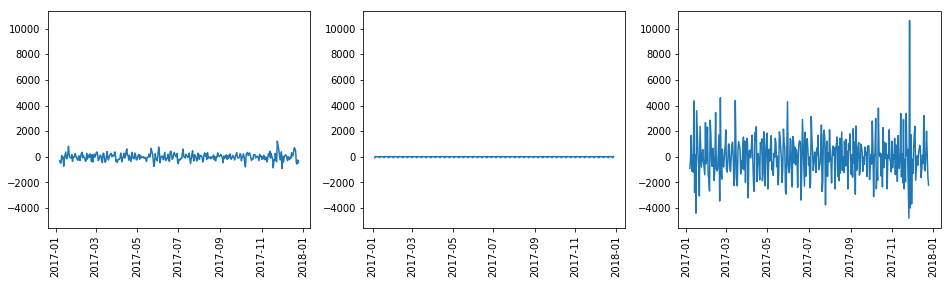

In [366]:
plt.figure(figsize=(16,4))
ax1=plt.subplot(1,3,1)
plt.plot(dec2.trend)
plt.xticks(rotation=90)
ax2=plt.subplot(1,3,2,sharey=ax1)
plt.xticks(rotation=90)
plt.plot(dec2.seasonal)
ax3=plt.subplot(1,3,3,sharey=ax1)
plt.plot(dec2.resid)
plt.xticks(rotation=90)

In [306]:
X2=X[6:-3]

In [308]:
RFR.fit(np.arange(356).reshape(-1,1),X2)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [309]:
X2

DateTime
2017-01-07    14202.413333
2017-01-08    13777.604762
2017-01-09    12784.931905
2017-01-10    12254.100000
2017-01-11    11886.830000
2017-01-12    11890.088095
2017-01-13    11535.450476
2017-01-14    11397.818571
2017-01-15    11628.034762
2017-01-16    12296.981429
2017-01-17    12753.820952
2017-01-18    12850.096667
2017-01-19    12996.861429
2017-01-20    13375.811429
2017-01-21    13521.973333
2017-01-22    13172.946667
2017-01-23    12695.924762
2017-01-24    12396.989048
2017-01-25    12469.031429
2017-01-26    12296.572857
2017-01-27    12298.638571
2017-01-28    12458.309048
2017-01-29    12870.713333
2017-01-30    13057.890952
2017-01-31    12867.669524
2017-02-01    12592.724286
2017-02-02    12178.190000
2017-02-03    11821.608571
2017-02-04    11311.294286
2017-02-05    10852.256190
                  ...     
2017-11-29    21372.639524
2017-11-30    20570.942381
2017-12-01    18895.486190
2017-12-02    17640.716190
2017-12-03    16671.850476
2017-12-04    17380

In [341]:
ax[0].set_x('alaki')

Text(0.5,1,'alaki')

In [398]:
Xdf=pd.DataFrame(NU.rolling(3).mean().dropna())

In [520]:
Xdf['dow']=Xdf.index.dayofweek
Xdf['doy']=Xdf.index.dayofyear
Xdf['day']=Xdf.index.day
Xdf['month']=Xdf.index.month
X=Xdf[['dow', 'doy']]#, 'day', 'month']]
y=Xdf['sale']


In [521]:
RFR.fit(X,y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [502]:
RFR.feature_importances_

array([0.20796161, 0.79203839])

In [419]:
datetime(2018,1,30)

ValueError: day is out of range for month

In [458]:
newd=(online).groupby('Date')['Date'].max()

In [460]:
newd+=10000

In [477]:
newd

,Date
0,20180101
1,20180102
2,20180103
3,20180104
4,20180105
5,20180106
6,20180107
7,20180108
8,20180109
9,20180110


In [475]:
#newdf=pd.DataFrame(newd.index)
#newd=newd.index
newd=pd.DataFrame(newd)


In [480]:
newdt=newd['Date'].apply(lambda x: datetime.strptime(str(x)[:4]+' '+str(x)[4:6]+' '+str(x)[6:8],'%Y %m %d'))

In [484]:
newdt=pd.DataFrame(newdt,columns=['Date'])
newdt.head()

,Date
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05


In [519]:

newdt['dow']=newdt['Date'].apply(lambda x:x.dayofweek)
newdt['doy']=newdt['Date'].apply(lambda x:x.dayofyear)
newdt['day']=newdt['Date'].apply(lambda x:x.day)
newdt['month']=newdt['Date'].apply(lambda x:x.month)
X_test=newdt[['dow', 'doy']]##, 'day', 'month']]

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Text(0.5,1,'2018 Prediction')

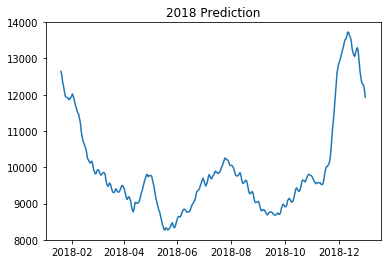

In [522]:
plt.plot(newdt['Date'],pd.DataFrame(RFR.predict(X_test)).rolling(20).mean()+3000)
plt.title('2018 Prediction')

In [451]:
RFR.predict(X_test)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([ 6449.97666667,  6449.97666667,  6449.97666667, ...,
       11644.26333333, 11644.26333333, 11644.26333333])

In [452]:
RFR.feature_importances_

array([0.19393764, 0.65393628, 0.13063764, 0.02148845])

In [509]:
X_test['doy']=X_test['doy']-365

D:\WorkSpace\Ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [507]:
X_test.head()

,dow,doy
0,0,366
1,1,367
2,2,368
3,3,369
4,4,370


In [462]:
online.head()

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
0,48497,20181231,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99
1,48496,20181231,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.0,80.52,395.00,33.14,6.50
2,48495,20181231,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1.0,151.88,149.00,12.06,6.50
3,48494,20181231,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1.0,48.92,47.99,3.82,6.50
4,48493,20181231,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1.0,121.30,119.00,8.31,6.50


In [544]:
percat=df.groupby('Product Category (Enhanced E-commerce)')['sale'].sum()

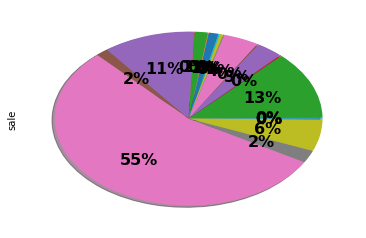

In [549]:
#explode = (0.1, 0, 0, 0)
#colors = ['#f45a5a', '#449dfc', '#93f96d', '#f9c86d']
percat.plot(kind="pie", legend=False, labels=None, startangle=0, autopct='%1.0f%%', pctdistance=0.6, shadow=True, textprops={'weight':'bold', 'fontsize':16}, )

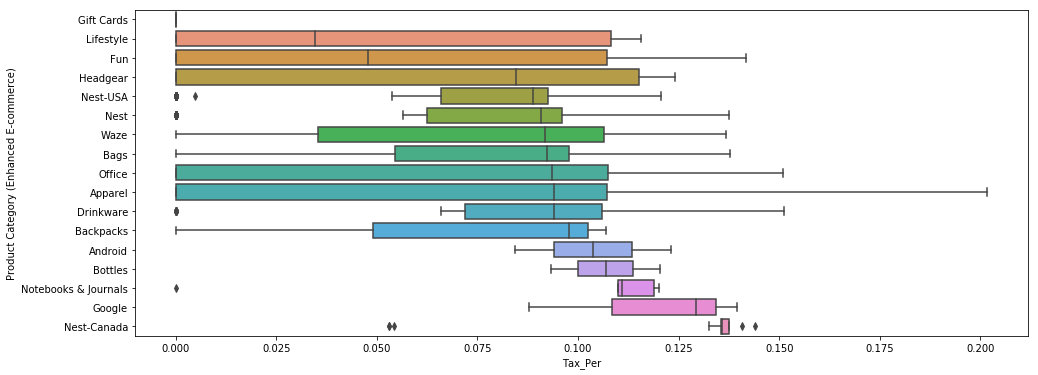

In [581]:
plt.figure(figsize=(16,6))
sns.boxplot(y=once['Product Category (Enhanced E-commerce)'],x=once['Tax_Per'],order=order.index)
#plt.xticks(rotation=90)

In [565]:
orde2=df.groupby('Product Category (Enhanced E-commerce)')['sale'].median().sort_values()

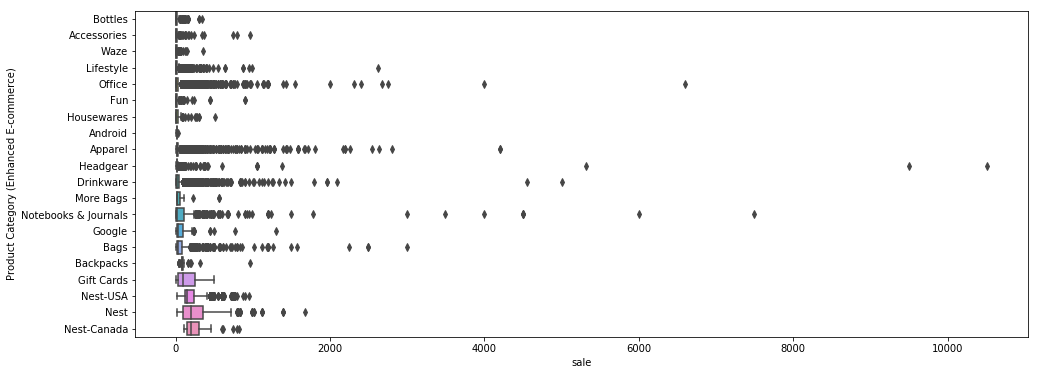

In [582]:
plt.figure(figsize=(16,6))
sns.boxplot(y=df['Product Category (Enhanced E-commerce)'],x=df['sale'],order=orde2.index)

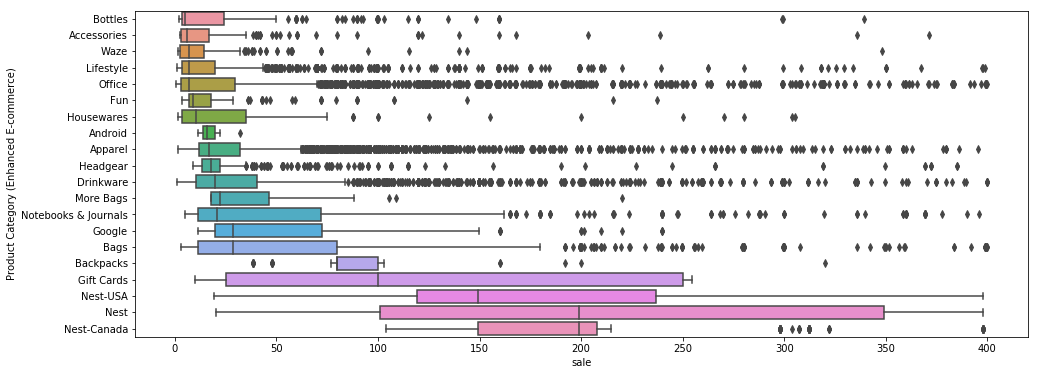

In [583]:
flag=df['sale']<400
plt.figure(figsize=(16,6))
sns.boxplot(y=df['Product Category (Enhanced E-commerce)'][flag],x=df['sale'][flag],order=orde2.index)

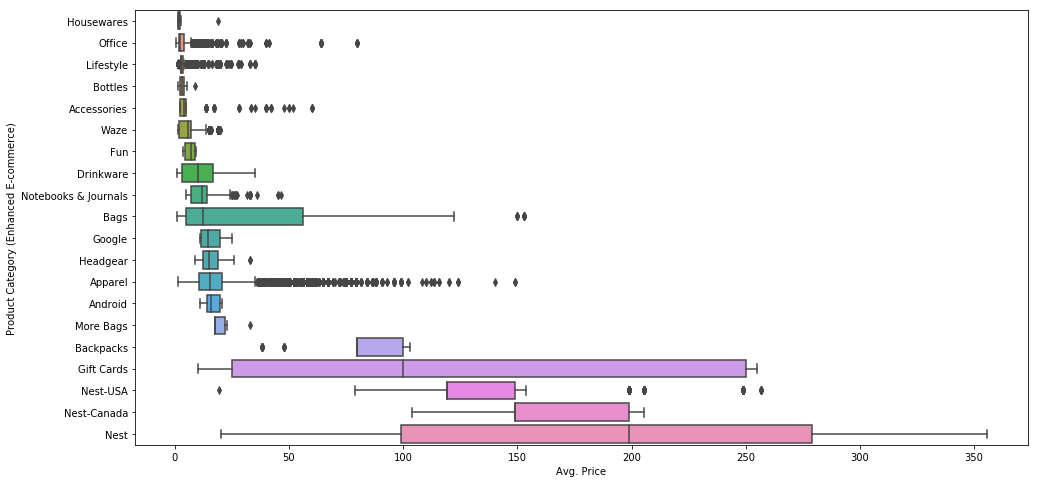

In [580]:
#flag=df['sale']<1000
orde3=df.groupby('Product Category (Enhanced E-commerce)')['Avg. Price'].median().sort_values()
plt.figure(figsize=(16,8))
sns.boxplot(y=df['Product Category (Enhanced E-commerce)'],x=df['Avg. Price'],order=orde3.index)

In [584]:
once['Tax_Free']=(once['Tax']==0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text xticklabel objects>)

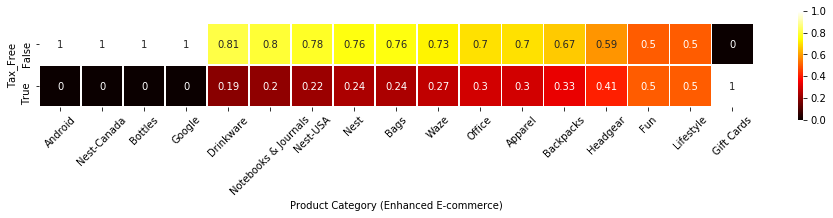

In [630]:
plt.figure(figsize=(16,2))
sns.heatmap(cth[ctht.sort_values(1).index],lw=.5,cmap='hot',annot=True,square=True)
plt.xticks(rotation=45)

In [600]:
ct=pd.crosstab(once['Tax_Free'],once['Product Category (Enhanced E-commerce)'])
cth=ct/ct.sum(axis=0)

In [611]:
cth

Product Category (Enhanced E-commerce),Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Lifestyle,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Tax_Free,,,,,,,,,,,,,,,,,
False,1.0,0.702073,0.666667,0.759494,1.0,0.8125,0.5,0.0,1.0,0.588235,0.5,0.761124,1.0,0.784158,0.8,0.702703,0.727273
True,0.0,0.297927,0.333333,0.240506,0.0,0.1875,0.5,1.0,0.0,0.411765,0.5,0.238876,0.0,0.215842,0.2,0.297297,0.272727


In [625]:
ctht=cth.transpose()
ctht.sort_values(1).index

Index(['Android', 'Nest-Canada', 'Bottles', 'Google', 'Drinkware',
       'Notebooks & Journals', 'Nest-USA', 'Nest', 'Bags', 'Waze', 'Office',
       'Apparel', 'Backpacks', 'Headgear', 'Fun', 'Lifestyle', 'Gift Cards'],
      dtype='object', name='Product Category (Enhanced E-commerce)')

In [622]:
ctht.transpose()

Product Category (Enhanced E-commerce),Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Lifestyle,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Tax_Free,,,,,,,,,,,,,,,,,
False,1.0,0.702073,0.666667,0.759494,1.0,0.8125,0.5,0.0,1.0,0.588235,0.5,0.761124,1.0,0.784158,0.8,0.702703,0.727273
True,0.0,0.297927,0.333333,0.240506,0.0,0.1875,0.5,1.0,0.0,0.411765,0.5,0.238876,0.0,0.215842,0.2,0.297297,0.272727


In [624]:
cth.columns

Index(['Android', 'Apparel', 'Backpacks', 'Bags', 'Bottles', 'Drinkware',
       'Fun', 'Gift Cards', 'Google', 'Headgear', 'Lifestyle', 'Nest',
       'Nest-Canada', 'Nest-USA', 'Notebooks & Journals', 'Office', 'Waze'],
      dtype='object', name='Product Category (Enhanced E-commerce)')